<a href="https://www.kaggle.com/code/sondosaabed/pareto-chart?scriptVersionId=189370442" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🔴 This notebook is created by https://www.kaggle.com/alaaomar85, uploaded by me to refrence

# Building a Pareto Chart

---
REf: https://www.youtube.com/watch?v=JixX2_GPv6s



>[Building a Pareto Chart](#updateTitle=true&folderId=1k1W4TNmIbpcTuR73crJ_szehJJWw95RK&scrollTo=tuXm1HiHvBxu)

>>>[Introduction to the Pareto Principle](#updateTitle=true&folderId=1k1W4TNmIbpcTuR73crJ_szehJJWw95RK&scrollTo=-0M2ProGAykJ)

>>>>[References](#updateTitle=true&folderId=1k1W4TNmIbpcTuR73crJ_szehJJWw95RK&scrollTo=-0M2ProGAykJ)



### Introduction to the Pareto Principle


---
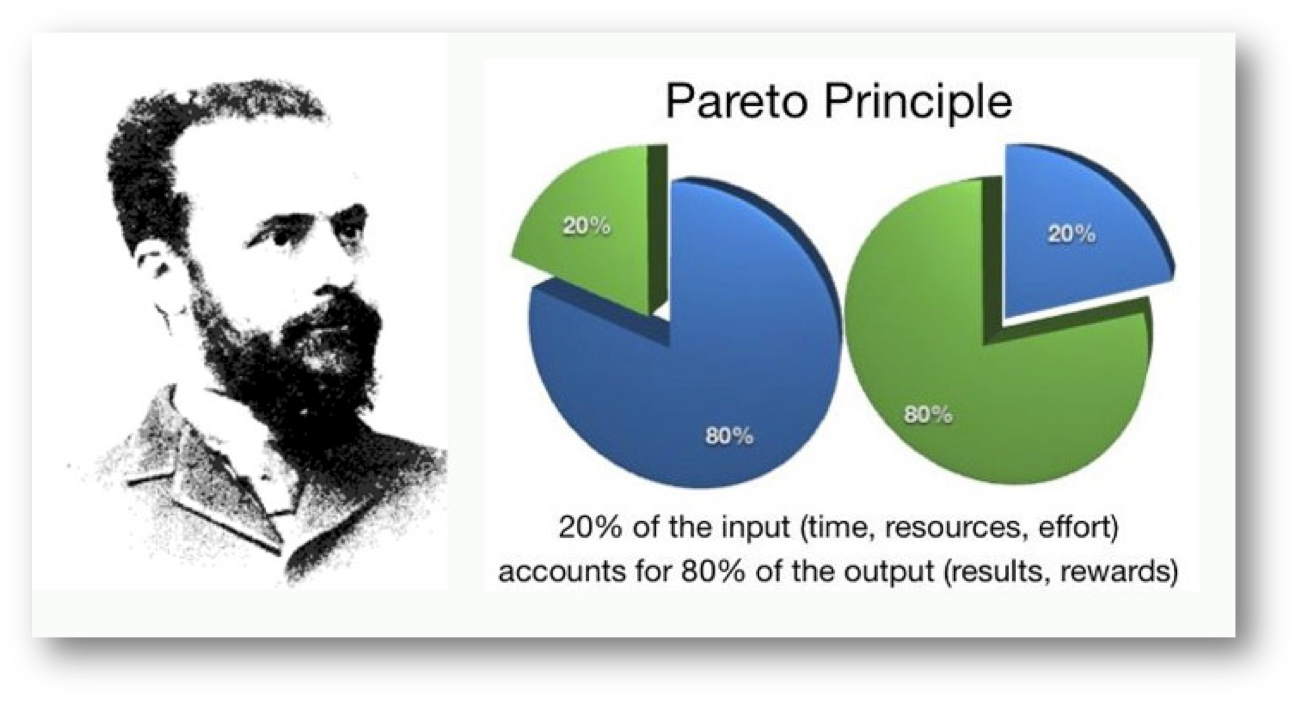
ref:https://www.google.com/url?sa=i&url=http%3A%2F%2Fwww.scruffydug.com%2Farticles%2Fpareto-principle-8020-rule%2F&psig=AOvVaw0WB3SK0udyrj6_I3bLrPd3&ust=1721244439269000&source=images&cd=vfe&opi=89978449&ved=0CBQQjhxqFwoTCKj647KlrIcDFQAAAAAdAAAAABAE

The Pareto Principle, also known as the 80/20 rule, is a concept that highlights an important relationship between effort and results. Named after the Italian economist Vilfredo Pareto, who first observed that 80% of Italy's land was owned by 20% of the population, this principle has since been applied to various fields, including business, economics, and quality control.

The core idea of the Pareto Principle is that a relatively small percentage of causes or inputs often lead to a large percentage of effects or outputs. In other words, approximately 80% of outcomes can be attributed to 20% of causes. This uneven distribution can be found in many contexts, such as:

- **Business**: 80% of sales often come from 20% of customers.
- **Project Management**: 80% of project delays are caused by 20% of the tasks.
- **Quality Control**: 80% of defects are caused by 20% of the problems.

By focusing on the critical 20% of factors that contribute most significantly to desired results, individuals and organizations can optimize their efforts and resources, leading to more efficient and effective outcomes. The Pareto Principle encourages prioritization and helps identify key areas that require attention for maximum impact.

In data analysis, a Pareto chart is a useful tool for visualizing this principle. It combines a bar chart showing the frequency of different categories with a line graph representing the cumulative percentage of the total. This visual representation helps to quickly identify the most significant factors, allowing for targeted improvements and decision-making.

#### References

- "Pareto Principle." Wikipedia, the Free Encyclopedia, [Wikipedia](https://en.wikipedia.org/wiki/Pareto_principle).
- "What is the Pareto Principle?" Investopedia, [Investopedia](https://www.investopedia.com/terms/p/pareto-principle.asp).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/firewall-logs/new_logs.csv')

In [3]:
df.head()

,Time,Log comp,Log subtype,Username,Firewall rule,Firewall rule name,NAT rule,NAT rule name,In interface,Out interface,Src IP,Dst IP,Src port,Dst port,protocol,Rule type,Live PCAP,Message,Log occurrence,Unnamed: 19
0,2024-07-06 12:29:34,Firewall Rule,Allowed,NaN,5.0,WebNat,10,iqrad webserver - DNAT,Port2,Port3,45.147.66.142,82.213.48.193,4036,443,TCP,1,Open PCAP,NaN,1,NaN
1,2024-07-06 12:29:30,Firewall Rule,Allowed,NaN,48.0,DMZ-to-WAN,15,Default SNAT IPv4,Port3,Port2,172.17.17.8,10.101.6.4,52907,443,TCP,1,Open PCAP,NaN,1,NaN
2,2024-07-06 12:29:29,Firewall Rule,Allowed,NaN,2.0,LAN-2-WAN,15,Default SNAT IPv4,Port1,Port2,192.168.61.137,3.72.193.109,53382,443,TCP,1,Open PCAP,NaN,1,NaN
3,2024-07-06 12:29:29,Firewall Rule,Allowed,NaN,5.0,WebNat,10,iqrad webserver - DNAT,Port2,Port3,45.147.66.142,82.213.48.193,32034,443,TCP,1,Open PCAP,NaN,1,NaN
4,2024-07-06 12:29:29,Firewall Rule,Allowed,NaN,48.0,DMZ-to-WAN,14,PublicDNS - SNAT,Port3,Port2,172.17.17.223,23.196.143.19,49302,443,TCP,1,Open PCAP,NaN,1,NaN


#Steps for Drawing the Pareto Chart

---



In [4]:
frequency_distribution= df['NAT rule name'].value_counts().sort_values(ascending=False)
frequency_distribution

NAT rule name
Default SNAT IPv4         157
iqrad webserver - DNAT     21
PublicDNS - SNAT           11
PublicDNS - DNAT            3
Name: count, dtype: int64

# Build the frequency Table

In [5]:
 #Step 1: Get the frequency distribution of the 'NAT rule name' column
# Convert the frequency distribution to a DataFrame and reset the index
df_ft = pd.DataFrame(frequency_distribution).reset_index()

# Rename the columns for better understanding
df_ft.columns = ['NAT rule name', 'Frequency']

df_ft

,NAT rule name,Frequency
0,Default SNAT IPv4,157
1,iqrad webserver - DNAT,21
2,PublicDNS - SNAT,11
3,PublicDNS - DNAT,3


In [6]:
total = df_ft['Frequency'].sum() # المجموع الكلي لجميع العناصر
total

192

In [7]:
df_ft['percentage'] = df_ft['Frequency'] / total * 100


In [8]:
df_ft

,NAT rule name,Frequency,percentage
0,Default SNAT IPv4,157,81.770833
1,iqrad webserver - DNAT,21,10.937500
2,PublicDNS - SNAT,11,5.729167
3,PublicDNS - DNAT,3,1.562500


# Step 2: Calculate the cumulative percentage

---



In [9]:
# Step 2: Calculate the cumulative percentage
df_ft['cumulative_percentage'] = df_ft['Frequency'].cumsum() / df_ft['Frequency'].sum() * 100

df_ft

,NAT rule name,Frequency,percentage,cumulative_percentage
0,Default SNAT IPv4,157,81.770833,81.770833
1,iqrad webserver - DNAT,21,10.937500,92.708333
2,PublicDNS - SNAT,11,5.729167,98.437500
3,PublicDNS - DNAT,3,1.562500,100.000000


# Step 3: Draw the bar Chart

---





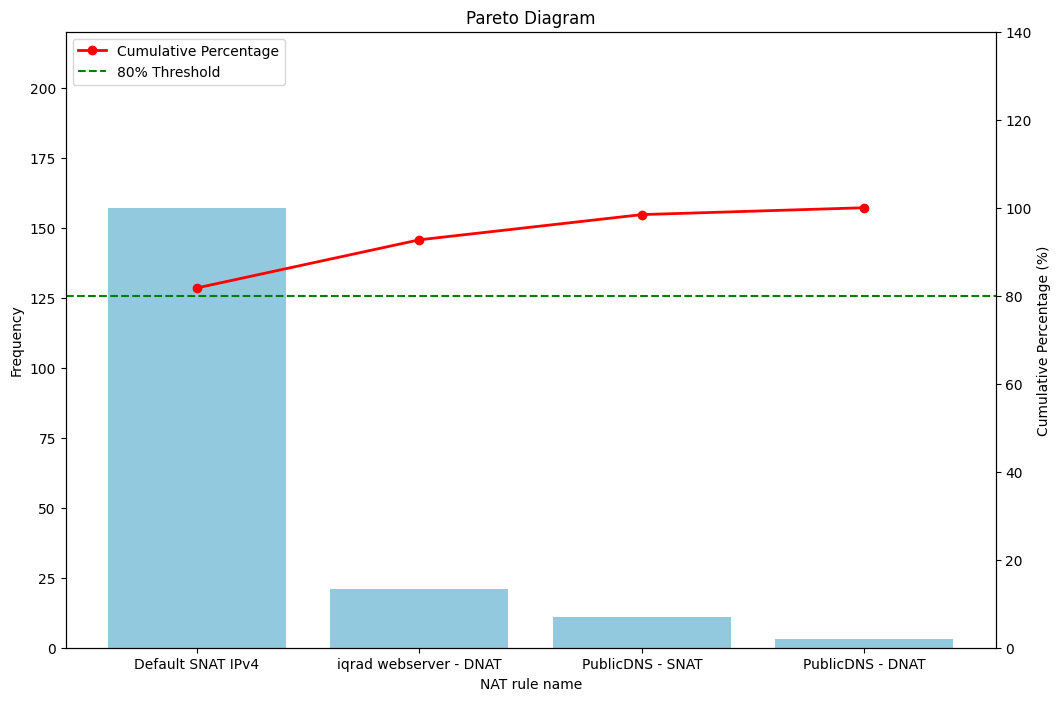

In [10]:

# Set up the matplotlib figure
fig, ax1 = plt.subplots()
fig.set_size_inches(12, 8)

# Create the bar plot for counts
sns.barplot(x='NAT rule name', y='Frequency', data=df_ft, color='skyblue', ax=ax1)

# Create a second y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(df_ft['NAT rule name'], df_ft['cumulative_percentage'], color='red', marker='o', linestyle='-', linewidth=2, label='Cumulative Percentage')

# Set y-axis limits for cumulative percentage to start from zero
ax2.set_ylim(0, 140) # increase the limit as needed
ax1.set_ylim(0, 220) # increase the limit as needed
# Add threshold line at 80%
ax2.axhline(80, color='green', linestyle='--', label='80% Threshold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Add a title and labels
ax1.set_title('Pareto Diagram')
ax1.set_xlabel('NAT rule name')
ax1.set_ylabel('Frequency')
ax2.set_ylabel('Cumulative Percentage (%)')

# Add legend
ax2.legend(loc='upper left')

# Show the plot
plt.show()

# Step 3: Put all things togther

---



*   Bar Chart
*   Line Chart



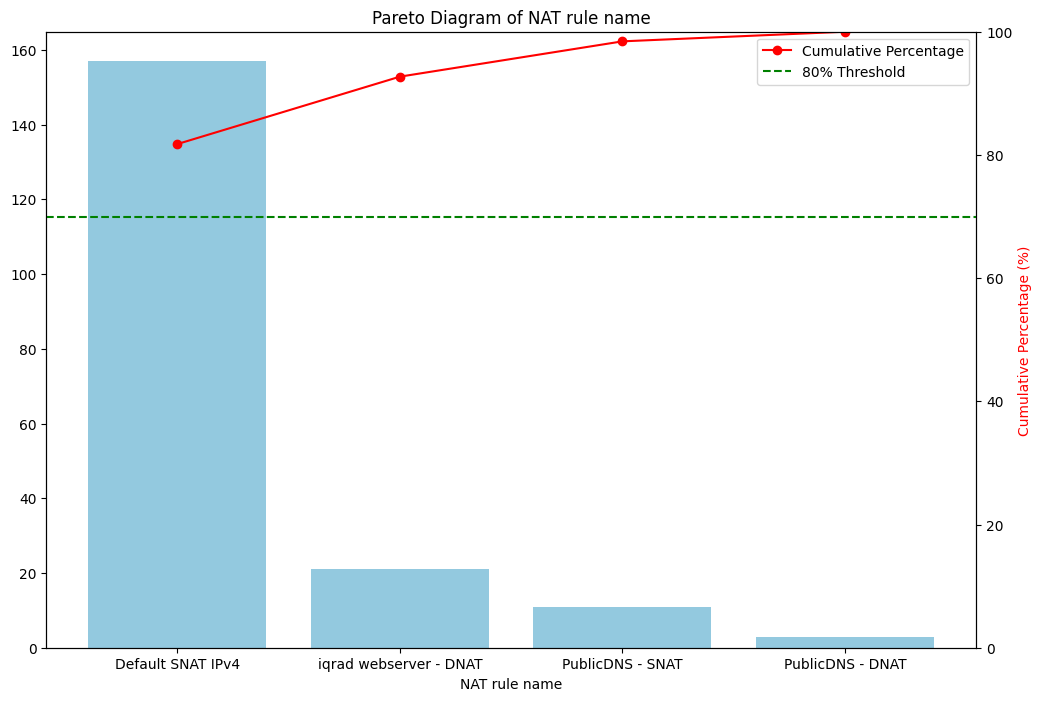

In [11]:
def plot_pareto_chart(df, column_name, pareto=80):
    """
    Plots a Pareto chart for the specified column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The column name for which to plot the Pareto chart.

    Returns:
    None
    """
    # Step 1: Get the frequency distribution of the specified column
    frequency_distribution = df[column_name].value_counts()


    # Step 2: Calculate the cumulative percentage
    cumulative_percentage = frequency_distribution.cumsum() / frequency_distribution.sum() * 100


    # Step 3: Create a Pareto diagram
    plt.figure(figsize=(12, 8))

    # Create bar chart for counts
    sns.barplot(x=frequency_distribution.index, y=frequency_distribution.values, color='skyblue', label='Frequency')

    # Create line chart for cumulative percentage
    ax2 = plt.gca().twinx()  # Create a second y-axis to plot the line chart on
    ax2.plot(frequency_distribution.index, cumulative_percentage, color='red', marker='o', label='Cumulative Percentage')

    # Add labels and title
    plt.title('Pareto Diagram of ' + column_name)
    plt.xlabel(column_name)
    plt.ylabel('Frequency', color='skyblue')
    ax2.set_ylabel('Cumulative Percentage (%)', color='red')

    # Set y-axis limits for cumulative percentage to start from zero
    ax2.set_ylim(0, 100)

    # Add threshold line at 80%
    ax2.axhline(pareto, color='green', linestyle='--', label='80% Threshold')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add legends
    plt.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Show the plot
    plt.show()

# Example usage:
plot_pareto_chart(df, 'NAT rule name', 70)
